# k-Nearest Neighbor Algorithm
## Jade Gee
---
---
### Overview

The k-Nearest Neighbor algorithm is a supervised machine learning algorithm that is used to solve classification and regression problems. It relies on the input data to learn a function that outputs appropriate results when provided new unlabeled data. A classification problem takes discrete data to predict was a particular input will be categorized as. For example, if your are given the data: "the child likes carrots" and "the child does not like carrots". The information has no in between data, the result is either one or the other.

As such, the KNN algorithm uses the assumption that the input data is true enough to predict the category that the information falls under based on the input data's closest data points within proximity as shown below.

![KNN](knn.png)

For the purpose of this project, we will implement the KNN algorithm on the [Iris data set](https://en.wikipedia.org/wiki/Iris_flower_data_set) using the Julia programming language to clasify the data and predict the species of flower based on the closest data points to the selected point that we are trying to predict.

To begin, we must add the following packages:

### Import Packages

The following packages are required for this notebook:
- [RDatasets documentation](https://github.com/JuliaStats/RDatasets.jl)
    + In order to access the iris data set that is available in the core of R.
- [Plots documentation](http://docs.juliaplots.org/latest/)
    + In order to visualize the data set using plots.

In [2]:
using RDatasets
using Plots

---
---
### Gather Data

We will gather the data that we are going to be using for our k-Nearest Neighbors algorithm. As we will be using a subset of the Iris data set, we need to isolate the data that we will be using in our algorithm. Therefore, we will pull the data and store it in its respective variables: `x_data` and `y_data`.

In [236]:
# Import the data
iris = dataset("datasets", "iris")

# Stores the Sepal Length, Sepal Width, and Petal Length -- creates the feature set
x_data = [x for x in zip(iris.SepalLength[1:30], iris.SepalWidth[1:30], iris.PetalLength[1:30])]
for i = 51:80
    push!(x_data, (iris.SepalLength[i], iris.SepalWidth[i], iris.PetalLength[i]))
end
for i = 101:130
    push!(x_data, (iris.SepalLength[i], iris.SepalWidth[i], iris.PetalLength[i]))
end

# Stores the Species of the respective iris -- creates the Label 
y_data = [iris.Species[i] for i = 1:30]
for i = 51:80
    push!(y_data, iris.Species[i])
end
for i = 101:130
    push!(y_data, iris.Species[i])
end

We will create a scatter plot of the subset of the iris data that we are using in the k-Nearest Neighbors Algorithm.

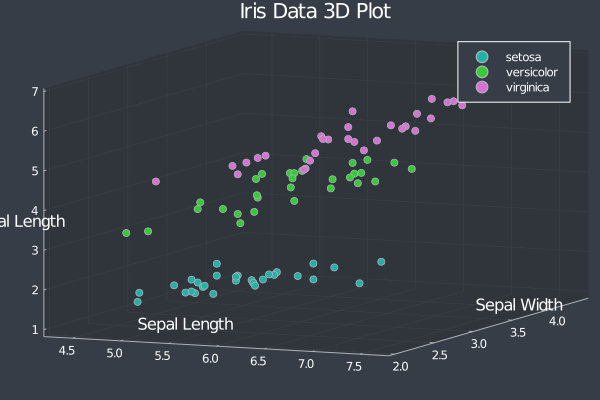

In [237]:
# Plot the data being used
theme(:dark)
scatter(xaxis = "Sepal Length",
    yaxis = "Sepal Width",
    zaxis = "Petal Length",
    title = "Iris Data 3D Plot")
scatter!(x_data[1:30], 
    label = "setosa", 
    color = "lightseagreen")
scatter!(x_data[31:60], 
    label = "versicolor", 
    color = "limegreen")
scatter!(x_data[61:90], 
    label = "virginica", 
    color = "orchid")

The above plot depicts the subset of the Iris data set that we will be using in this algorithm.

---
### Define the functions

We will need to create three functions for the implementation of this algorithm:

- a distance function
    + to calculate the distance between data points
- a KNN function
    + to implement the algorithm
- a neighbors function
    + to display and store the data points that are in closest proximity to our target point

In [238]:
"""
p1:  the first data point
p2:  the second data point

Calculates the distance between two data points in the feature set.

Returns:
The distance between the two data points.
"""
function distance(p1, p2)
    return sqrt(sum([(p1[i]-p2[i])^2 for i = 1:length(p1)]))
end

distance (generic function with 1 method)

In [239]:
"""
target:  the target data point
set:     data stored for x from the data set
labels:  the species for the data in the set
k:       the distance betwen the two data points being analyzed

Stores the set, labels, and distance; then iterates through the set to verify that the target point is in the set.

Returns:
The distance array sorted by distance.
"""
function KNN(target, set, labels, k)
    distance_array = [(set[i], labels[i], distance(target, set[i])) 
        for i = 1:length(set) 
            if target != set[i]]
    
    sort!(distance_array, by = x -> x[3])
    return distance_array[1:k]
end   

KNN (generic function with 1 method)

In [240]:
target = [] # Saves the Target Point
tested = [] #Saves the Nearest Neighbors

# Create a function to test a point
test_point(i) = (iris.SepalLength[i], iris.SepalWidth[i], iris.PetalLength[i])

# Create a function to display the neighbors of a test point
"""
i:  an index number within the set
k:  the distance between the data points

Identifies the target point, then displays the closest data points to the target and stores both into separate arrays.

Returns:
The target point's nearest data points.
"""
function neighbors(i, k)
    push!(target, test_point(i))
    println("")
    println("Target Point P = ", test_point(i))
    println("Target Label P = ", iris.Species[i])
    println("k = ", k)
    println("______________________________")
    println("")
    test = KNN(test_point(i), x_data, y_data, k)
    
    # Displays neighbors
    for i = 1:length(test)
        println("Point $i = ", test[i][1])
        println("Point Label = ", test[i][2])
        println("Distance = ", test[i][3])
        println("")
        append!(test_array, test[i][1])
        push!(tested, (test[i][1][1], test[i][1][2], test[i][1][3]))
    end
    println("______________________________")
    println("")
end

neighbors (generic function with 1 method)

### Testing the algorithm

Now, we will test the KNN algorithm that we have built.

In [241]:
#Test Function
neighbors(52, 6)


Target Point P = (6.4, 3.2, 4.5)
Target Label P = versicolor
k = 6
______________________________

Point 1 = (6.3, 3.3, 4.7)
Point Label = versicolor
Distance = 0.24494897427831802

Point 2 = (6.6, 3.0, 4.4)
Point Label = versicolor
Distance = 0.29999999999999954

Point 3 = (6.7, 3.1, 4.4)
Point Label = versicolor
Distance = 0.33166247903553975

Point 4 = (6.4, 2.9, 4.3)
Point Label = versicolor
Distance = 0.36055512754639923

Point 5 = (6.6, 2.9, 4.6)
Point Label = versicolor
Distance = 0.3741657386773939

Point 6 = (6.5, 2.8, 4.6)
Point Label = versicolor
Distance = 0.4242640687119287

______________________________



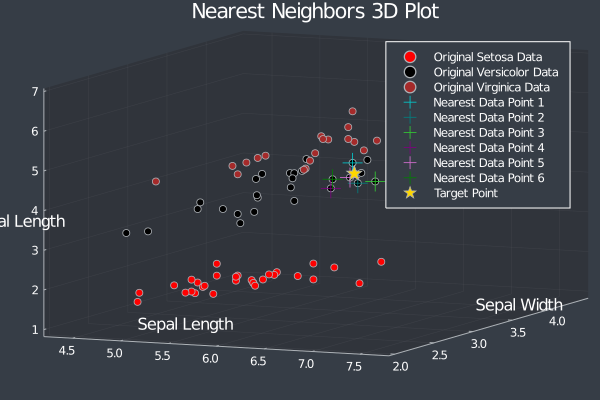

In [269]:
# Plot the Original Data and Overlay the Target Data Point and its nearest neighbors
theme(:dark)

# Original Data
scatter(title = "Nearest Neighbors 3D Plot",
        xaxis = "Sepal Length",
        yaxis = "Sepal Width",
        zaxis = "Petal Length")
scatter!(x_data[1:30], 
        label = "Original Setosa Data", 
        color = "red")
scatter!(x_data[31:60], 
        label = "Original Versicolor Data", 
        color = "black")
scatter!(x_data[61:90], 
        label = "Original Virginica Data", 
        color = "brown")

# Neighbors
scatter!(tested[1],
        color = "darkturquoise", markersize = 10, markershape = :cross,
        label = "Nearest Data Point 1")
scatter!(tested[2],
        color = "teal", markersize = 10, markershape = :cross,
        label = "Nearest Data Point 2")
scatter!(tested[3],
        color = "limegreen", markersize = 10, markershape = :cross,
        label = "Nearest Data Point 3")
scatter!(tested[4],
        color = "purple", markersize = 10, markershape = :cross,
        label = "Nearest Data Point 4")
scatter!(tested[5],
        color = "orchid", markersize = 10, markershape = :cross,
        label = "Nearest Data Point 5")
scatter!(tested[6],
        color = "green", markersize = 10, markershape = :cross,
        label = "Nearest Data Point 6")

# Target Point
scatter!(target[1],
        color = "gold", markersize = 8, markershape = :star,
        label = "Target Point")

## Conclusion

As you can see from the above plot, this k-Nearest Neighbors algorithm successfully identified the data points within the closest proximity to our target point. 

---
---
For additional information regarding k-Nearest Neighbor Algorithm, as well as deeper knowledge, please see the following links:

- [KNN Image](https://medium.com/@sonish.sivarajkumar/k-nearest-neighbours-knn-algorithm-9900c1427726)
    + The image shown at the top.

- [K-nearest Negihbor on Scholarpedia](http://www.scholarpedia.org/article/K-nearest_neighbor)

- [KNN Algorithm on Wiki](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm#Algorithm)

- [ML Basics with the KNN](https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761)

---
---